# Pytorch

In [ ]:
import torch
import torch.nn as nn

## 1. Pytorch Basics

In [ ]:
# Create tensors
a = torch.tensor([1.0, 2.0, 3.0])
torch.manual_seed(87)                   # seed
b = torch.randn(2, 3)
print(a)
print(b)
print(a + b[0])
print(a + b[0, 0])      # broadcasting
print(a[0])
print(a[0].item())      # single-element tensor to a standard Python number 
print(a.tolist())       # tensor to a Python list

tensor([1., 2., 3.])
tensor([[ 1.4019,  0.2587, -0.5752],
        [ 0.7501,  2.6630,  0.7842]])
tensor([2.4019, 2.2587, 2.4248])
tensor([2.4019, 3.4019, 4.4019])
tensor(1.)
1.0
[1.0, 2.0, 3.0]


In [4]:
# Tensor operations
torch.manual_seed(87)
c = torch.randn(2, 3)
d = torch.randn(3, 2)
print("Matrix multiplication c @ d:", c @ d)

Matrix multiplication c @ d: tensor([[ 1.3214,  3.0939],
        [ 1.6557, -4.0866]])


In [5]:
# Autograd
x = torch.tensor(2.0, requires_grad=True)   # The input should be either float or complex; integer input incurs an error.
y = x**2 + 3*x + 1

print(y)
y.backward()                                # save gradient in x.grad

print(x.grad)

tensor(11., grad_fn=<AddBackward0>)
tensor(7.)


In [6]:
# It's dynamic!
x = torch.tensor([-1.0], requires_grad=True)
if x > 1:
    y = x ** 2
else:
    y = x ** 3

print(y)
y.backward()

print(x.grad)

tensor([-1.], grad_fn=<PowBackward0>)
tensor([3.])


In [ ]:
# DataFrame to tensor
import pandas as pd

df = pd.DataFrame({
    'x1': [1, 2, 3],
    'x2': [4, 5, 6]
})

df_tensor = torch.tensor(df.values, dtype=torch.float32)
print(df_tensor)

# numpy array to tensor
import numpy as np

arr = np.array([[1.2, 2.3, 3.5],
                [4.1, 0.2, 3.2]])

arr_tensor = torch.tensor(arr, dtype = torch.float32)
print(arr_tensor)

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
tensor([[1.2000, 2.3000, 3.5000],
        [4.1000, 0.2000, 3.2000]])


## 2. Build your model
### 2.1 Basic Ingredients
1. Model structure: type of layer, dimension of layer, number of layers

In `pytorch`, there are many different ways to construct a neural network. Among them, we will check two methods.

The following two code blocks define the same neural network.

---

**Method A**
- custom forward pass is available
- possible to check intermediate output
- better for complex network

In [8]:
class ModelMethodA(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(10, 5)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(5, 1)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

**Method B**
- easier to specify forward pass
- better for simple network

In [9]:
class ModelMethodB(nn.Module):
    def __init__(self):
        super().__init__()
        layers = [
            nn.Linear(10, 5),
            nn.ReLU(),
            nn.Linear(5, 1)
        ]
        self.net = nn.Sequential(*layers)   # * unpacks the list of layers

    def forward(self, x):
        return self.net(x)

---

In this notebook, we will stick to the method B.

In [10]:
class SimpleMLP(nn.Module):
    def __init__(self, input_dim, hidden_dims=[32, 64, 32], output_dim=1):
        super().__init__()
        layers = []
        prev_dim = input_dim
        
        for hidden_dim in hidden_dims:
            layers.extend([
                nn.Linear(prev_dim, hidden_dim),
                nn.ReLU(),
            ])
            prev_dim = hidden_dim
        
        layers.append(nn.Linear(prev_dim, output_dim))
        self.net = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.net(x)

In [11]:
model = SimpleMLP(input_dim=10, hidden_dims = [16, 32, 16])
print(model)

SimpleMLP(
  (net): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=16, bias=True)
    (5): ReLU()
    (6): Linear(in_features=16, out_features=1, bias=True)
  )
)


2. Loss function
- Regression: `torch.nn.MSELoss()`, `torch.nn.L1Loss()`, `torch.nn.HuberLoss()`, ...
- Classification: `torch.nn.CrossEntropyLoss()`, ...

In [12]:
criterion = nn.MSELoss()

pred = torch.tensor([[1.0], [2.0], [3.0]])
target = torch.tensor([[0.1], [2.5], [2.8]])

loss = criterion(pred, target)                  # pred and target should be tensors

print("Loss:", loss.item())

Loss: 0.36666664481163025


3. Optimizer
- GD & SGD: `torch.optim.SGD()`
- Adam: `torch.optim.Adam()`
- ...

In [13]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.005)         # Core arguments: params of model, learning rate

### 2.2 Fitting, Evaluating, Validating (w/ Example)

In [ ]:
from sklearn.model_selection import train_test_split

In [50]:
# Data load
X_train, y_train = pd.read_csv("X_train.csv", header=None), pd.read_csv("y_train.csv", header=None)
X_test, y_test = pd.read_csv("X_test.csv", header=None), pd.read_csv("y_test.csv", header=None)

# train validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 1)

In [51]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9
306,-0.06097,-0.30978,0.55204,-0.93858,0.33915,-0.33181,-0.64076,-1.15955,0.63459,-0.54840
585,0.27446,-0.83945,-2.20280,0.33396,-0.57066,-0.65655,-0.78851,1.96962,-0.64434,0.36022
107,0.10495,0.04010,0.33809,-1.62395,0.01986,0.73585,1.42593,0.44321,-0.72906,-1.32862
17,1.64369,0.18357,-0.56177,-2.14856,0.53474,-0.44884,-0.40132,-0.11268,-0.92883,0.50513
609,-0.77277,-0.38880,0.20486,1.40610,-0.68461,-0.71940,-0.93984,-1.09720,-1.61368,-0.80651


In [53]:
# Transform to tensor
X_train = torch.tensor(X_train.values, dtype=torch.float32)
X_val = torch.tensor(X_val.values, dtype=torch.float32)
X_test = torch.tensor(X_test.values, dtype=torch.float32)

y_train = torch.tensor(y_train.values, dtype=torch.float32)
y_val = torch.tensor(y_val.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

In [54]:
# Seed
torch.manual_seed(100)

# Instantiation
model = SimpleMLP(input_dim=X_train.shape[1], hidden_dims=[16, 32, 16], output_dim=1)

# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Epoch
epochs = 5000  # Reasonable number of epochs

# History
train_losses = []
val_losses = []

# Best model
best_val_loss = float('inf')     # starting with infinity
best_model_state = None          # best model parameters

print("Training started...")
print(f"{'='*50}\n")

for epoch in range(epochs):
    # Training phase
    model.train()                                # Set the model to training mode
    
    pred = model(X_train)                        # (1) Forward
    
    loss = criterion(pred, y_train)              # (2) Loss computation
    
    optimizer.zero_grad()                        # Clear previous grad
    loss.backward()                              # (3) Gradient computation
    
    optimizer.step()                             # (4) Parameter update

    train_losses.append(loss.item())             # Track train loss
    
    # Validation phase
    model.eval()                                 # Set the model to evaluation mode
    with torch.no_grad():                        # Disable gradient tracking
        val_pred = model(X_val)          
        val_loss = criterion(val_pred, y_val)
        val_losses.append(val_loss.item())       # Track validation loss

        # Save best model
        if val_loss.item() < best_val_loss:
            best_val_loss = val_loss.item()
            best_model_state = model.state_dict()   # Save the best model parameters

    # Print progress every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1:3d}, Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")

print(f"\n{'='*50}")
print("Training completed!")
print(f"Best loss: {best_val_loss:.4f}")

Training started...

Epoch 100, Train Loss: 0.1828, Val Loss: 0.2087
Epoch 200, Train Loss: 0.1590, Val Loss: 0.2093
Epoch 300, Train Loss: 0.1168, Val Loss: 0.1794
Epoch 400, Train Loss: 0.0991, Val Loss: 0.1669
Epoch 500, Train Loss: 0.0872, Val Loss: 0.1553
Epoch 600, Train Loss: 0.0788, Val Loss: 0.1494
Epoch 700, Train Loss: 0.0740, Val Loss: 0.1472
Epoch 800, Train Loss: 0.0698, Val Loss: 0.1463
Epoch 900, Train Loss: 0.0660, Val Loss: 0.1460
Epoch 1000, Train Loss: 0.0621, Val Loss: 0.1456
Epoch 1100, Train Loss: 0.0584, Val Loss: 0.1448
Epoch 1200, Train Loss: 0.0545, Val Loss: 0.1422
Epoch 1300, Train Loss: 0.0522, Val Loss: 0.1401
Epoch 1400, Train Loss: 0.0489, Val Loss: 0.1378
Epoch 1500, Train Loss: 0.0467, Val Loss: 0.1357
Epoch 1600, Train Loss: 0.0451, Val Loss: 0.1333
Epoch 1700, Train Loss: 0.0435, Val Loss: 0.1317
Epoch 1800, Train Loss: 0.0417, Val Loss: 0.1302
Epoch 1900, Train Loss: 0.0397, Val Loss: 0.1284
Epoch 2000, Train Loss: 0.0376, Val Loss: 0.1268
Epoch 21

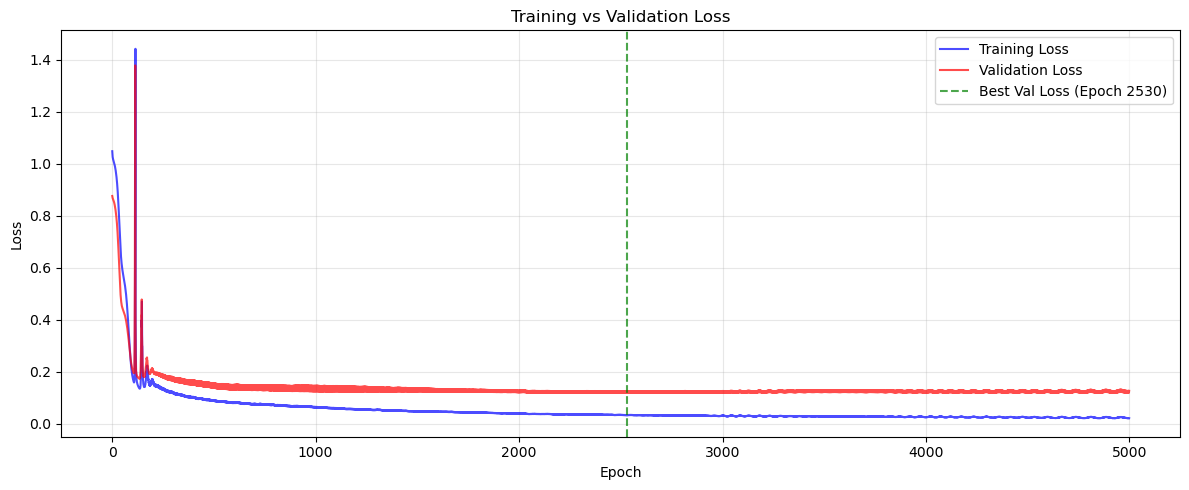

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.plot(train_losses, label='Training Loss', color='blue', alpha=0.7)
plt.plot(val_losses, label='Validation Loss', color='red', alpha=0.7)

plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# Add annotation to highlight overfitting
if len(val_losses) > 50:
    # Find where validation loss starts increasing
    val_losses_array = np.array(val_losses)
    min_val_epoch = np.argmin(val_losses_array)
    plt.axvline(x=min_val_epoch, color='green', linestyle='--', alpha=0.7, label=f'Best Val Loss (Epoch {min_val_epoch})')
    plt.legend()

plt.tight_layout()
plt.show()

### 2.3 Prediction (w/ Example)

In [56]:
model.load_state_dict(best_model_state)             # Recover the best model
model.eval()

with torch.no_grad(): 
    y_test_pred = model(X_test)

test_loss = criterion(y_test_pred, y_test)

print(f'Test loss: {test_loss: .4f}')

Test loss:  0.1060


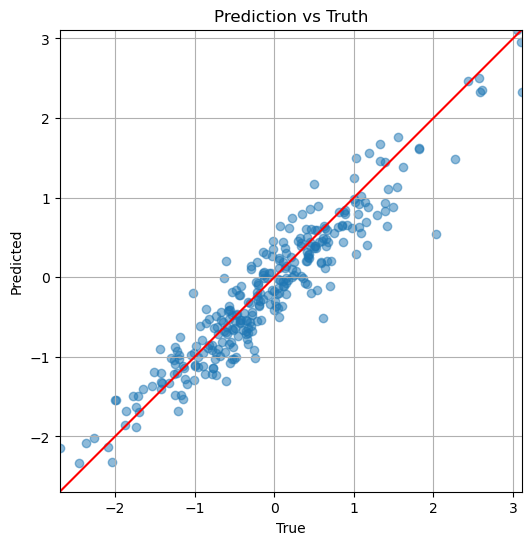

In [57]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(y_test, y_test_pred, alpha=0.5)
ax.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r-')

ax.set_xlabel("True")
ax.set_ylabel("Predicted")
ax.set_title("Prediction vs Truth")
ax.set_xlim(y_test.min(), y_test.max())
ax.set_ylim(y_test.min(), y_test.max())
ax.set_aspect('equal', adjustable='box')
ax.grid(True)

plt.show()

## 3. Potential Ways to Improve the Model
1. Network structure (deeper? wider?), optimizer, ...
2. Mini-batch training
3. Dropout
4. ...

### 3.2 Mini-batch training
**Mini-batch training** is a learning strategy in which the dataset is divided into small batches (e.g., 32, 64, 128 samples per batch), and the model updates its parameters after processing each batch, instead of waiting to see the entire dataset (full-batch vanilla GD). This means that within a single epoch, the model performs **multiple weight updates**, one for each mini-batch.

- **Faster Convergence**: The model updates its weights more frequently than full-batch training, which can help it converge faster.
- **Better Generalization**: The randomness in mini-batches acts like a regularizer and helps prevent overfitting.
- **Memory Efficiency**: Only a small part of the dataset needs to fit in memory at once, making it suitable for large datasets.

In [36]:
from torch.utils.data import TensorDataset, DataLoader

# Mini-batch settings
batch_size = 64
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [42]:
# Seed
torch.manual_seed(100)

# Instantiation
model = SimpleMLP(input_dim=X_train.shape[1], hidden_dims=[16, 32, 16], output_dim=1)

# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)       # better to have smaller learning rate for minibatch

# Epoch
epochs = 5000  # Reasonable number of epochs

# History
train_losses = []
val_losses = []

# Best model
best_val_loss = float('inf')     # starting with infinity
best_model_state = None          # best model parameters

print("Training started...")
print(f"{'='*50}\n")

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    # --------------------------
    # Minibatch training loop
    for X_batch, y_batch in train_loader:
        pred = model(X_batch)
        loss = criterion(pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * X_batch.size(0)  # total loss sum
    # --------------------------

    # Average loss over entire training set
    epoch_train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_train_loss)
    
    # Validation phase
    model.eval()                                 # Set the model to evaluation mode
    with torch.no_grad():                        # Disable gradient tracking
        val_pred = model(X_val)          
        val_loss = criterion(val_pred, y_val)
        val_losses.append(val_loss.item())       # Track validation loss

        # Save best model
        if val_loss.item() < best_val_loss:
            best_val_loss = val_loss.item()
            best_model_state = model.state_dict()   # Save the best model parameters

    # Print progress every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1:3d}, Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")

print(f"\n{'='*50}")
print("Training completed!")
print(f"Best loss: {best_val_loss:.4f}")

Training started...

Epoch 100, Train Loss: 0.3532, Val Loss: 0.3988
Epoch 200, Train Loss: 0.0970, Val Loss: 0.1432
Epoch 300, Train Loss: 0.0730, Val Loss: 0.1127
Epoch 400, Train Loss: 0.0626, Val Loss: 0.1060
Epoch 500, Train Loss: 0.0597, Val Loss: 0.1027
Epoch 600, Train Loss: 0.0422, Val Loss: 0.1051
Epoch 700, Train Loss: 0.0391, Val Loss: 0.1093
Epoch 800, Train Loss: 0.0400, Val Loss: 0.1113
Epoch 900, Train Loss: 0.0325, Val Loss: 0.1124
Epoch 1000, Train Loss: 0.0475, Val Loss: 0.1124
Epoch 1100, Train Loss: 0.0310, Val Loss: 0.1124
Epoch 1200, Train Loss: 0.0226, Val Loss: 0.1125
Epoch 1300, Train Loss: 0.0284, Val Loss: 0.1127
Epoch 1400, Train Loss: 0.0233, Val Loss: 0.1129
Epoch 1500, Train Loss: 0.0283, Val Loss: 0.1125
Epoch 1600, Train Loss: 0.0208, Val Loss: 0.1131
Epoch 1700, Train Loss: 0.0197, Val Loss: 0.1152
Epoch 1800, Train Loss: 0.0255, Val Loss: 0.1168
Epoch 1900, Train Loss: 0.0214, Val Loss: 0.1185
Epoch 2000, Train Loss: 0.0196, Val Loss: 0.1194
Epoch 21

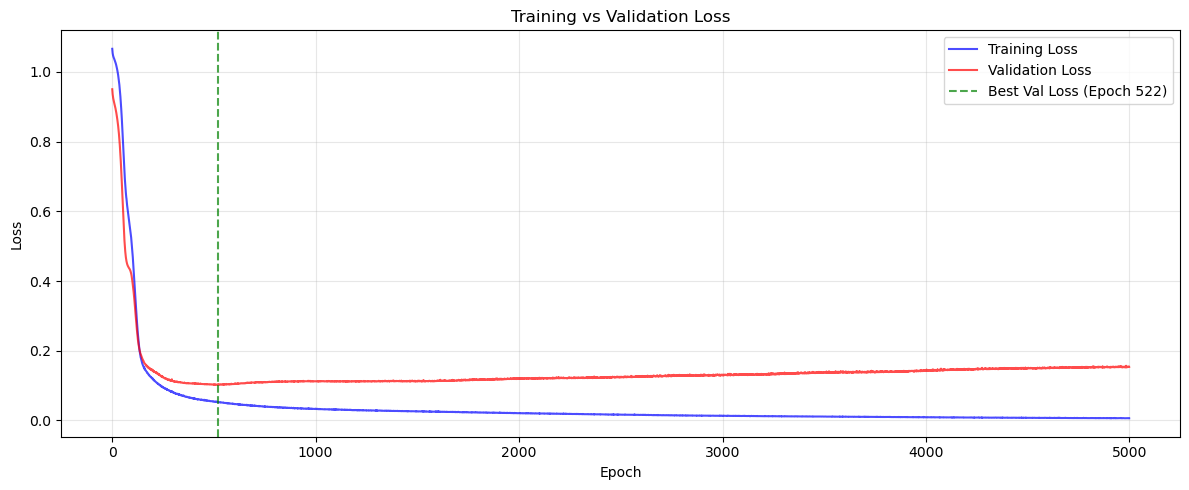

In [38]:
plt.figure(figsize=(12, 5))

plt.plot(train_losses, label='Training Loss', color='blue', alpha=0.7)
plt.plot(val_losses, label='Validation Loss', color='red', alpha=0.7)

plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# Add annotation to highlight overfitting
if len(val_losses) > 50:
    # Find where validation loss starts increasing
    val_losses_array = np.array(val_losses)
    min_val_epoch = np.argmin(val_losses_array)
    plt.axvline(x=min_val_epoch, color='green', linestyle='--', alpha=0.7, label=f'Best Val Loss (Epoch {min_val_epoch})')
    plt.legend()

plt.tight_layout()
plt.show()

In [39]:
model.load_state_dict(best_model_state)             # Recover the best model
model.eval()

with torch.no_grad(): 
    y_test_pred = model(X_test)

test_loss = criterion(y_test_pred, y_test)

print(f'Test loss: {test_loss: .4f}')

Test loss:  0.1502


### 3.3 Dropout
Dropout is a regularization technique to reduce overfitting in neural networks.

During training, it randomly **disables** (sets to zero) some neurons with a given probability `p`.

1.  **Training:** Each forward pass randomly drops a subset of neurons.
2.  **Evaluation:** During evaluation, dropout is completely disabled. All neurons are used. In PyTorch, you simply need to put your model in evaluation mode (`model.eval()`).


- **Robust Features:** Neurons can't depend on specific others, so the network learns redundant, generalizable features.
- **Ensemble Effect:** It's like training many smaller networks and averaging them at test time, improving generalization.

In [43]:
class MLPwithDropout(nn.Module):
    def __init__(self, input_dim, hidden_dims=[32, 64, 32], output_dim=1, dropout=0.2):
        super().__init__()
        layers = []
        prev_dim = input_dim
        
        for hidden_dim in hidden_dims:
            layers.extend([
                nn.Linear(prev_dim, hidden_dim),
                nn.ReLU(),
                nn.Dropout(dropout)
            ])
            prev_dim = hidden_dim
        
        layers.append(nn.Linear(prev_dim, output_dim))
        self.net = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.net(x)

In [44]:
model = MLPwithDropout(input_dim=10, hidden_dims = [16, 32, 16], dropout=0.25)
print(model)

MLPwithDropout(
  (net): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.25, inplace=False)
    (3): Linear(in_features=16, out_features=32, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.25, inplace=False)
    (6): Linear(in_features=32, out_features=16, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.25, inplace=False)
    (9): Linear(in_features=16, out_features=1, bias=True)
  )
)


In [45]:
# Seed
torch.manual_seed(100)

# Instantiation
model = MLPwithDropout(input_dim=X_train.shape[1], hidden_dims=[16, 32, 16], output_dim=1, dropout=0.25)

# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Epoch
epochs = 5000  # Reasonable number of epochs

# History
train_losses = []
val_losses = []

# Best model
best_val_loss = float('inf')     # starting with infinity
best_model_state = None          # best model parameters

print("Training started...")
print(f"{'='*50}\n")

for epoch in range(epochs):
    # Training phase
    model.train()                                # Set the model to training mode
    
    pred = model(X_train)                        # (1) Forward
    
    loss = criterion(pred, y_train)              # (2) Loss computation
    
    optimizer.zero_grad()                        # Clear previous grad
    loss.backward()                              # (3) Gradient computation
    
    optimizer.step()                             # (4) Parameter update

    train_losses.append(loss.item())             # Track train loss
    
    # Validation phase
    model.eval()                                 # Set the model to evaluation mode
    with torch.no_grad():                        # Disable gradient tracking
        val_pred = model(X_val)          
        val_loss = criterion(val_pred, y_val)
        val_losses.append(val_loss.item())       # Track validation loss

        # Save best model
        if val_loss.item() < best_val_loss:
            best_val_loss = val_loss.item()
            best_model_state = model.state_dict()   # Save the best model parameters

    # Print progress every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1:3d}, Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")

print(f"\n{'='*50}")
print("Training completed!")
print(f"Best loss: {best_val_loss:.4f}")

Training started...

Epoch 100, Train Loss: 0.7029, Val Loss: 0.4350
Epoch 200, Train Loss: 0.4462, Val Loss: 0.2068
Epoch 300, Train Loss: 0.3448, Val Loss: 0.1617
Epoch 400, Train Loss: 0.2542, Val Loss: 0.1465
Epoch 500, Train Loss: 0.2545, Val Loss: 0.1420
Epoch 600, Train Loss: 0.2611, Val Loss: 0.1473
Epoch 700, Train Loss: 0.2167, Val Loss: 0.1569
Epoch 800, Train Loss: 0.2238, Val Loss: 0.1837
Epoch 900, Train Loss: 0.2145, Val Loss: 0.1827
Epoch 1000, Train Loss: 0.1978, Val Loss: 0.1820
Epoch 1100, Train Loss: 0.1712, Val Loss: 0.1649
Epoch 1200, Train Loss: 0.1767, Val Loss: 0.1860
Epoch 1300, Train Loss: 0.1816, Val Loss: 0.1853
Epoch 1400, Train Loss: 0.1578, Val Loss: 0.1761
Epoch 1500, Train Loss: 0.2089, Val Loss: 0.1754
Epoch 1600, Train Loss: 0.1691, Val Loss: 0.1828
Epoch 1700, Train Loss: 0.1788, Val Loss: 0.1778
Epoch 1800, Train Loss: 0.2070, Val Loss: 0.1832
Epoch 1900, Train Loss: 0.1907, Val Loss: 0.1693
Epoch 2000, Train Loss: 0.1615, Val Loss: 0.1911
Epoch 21

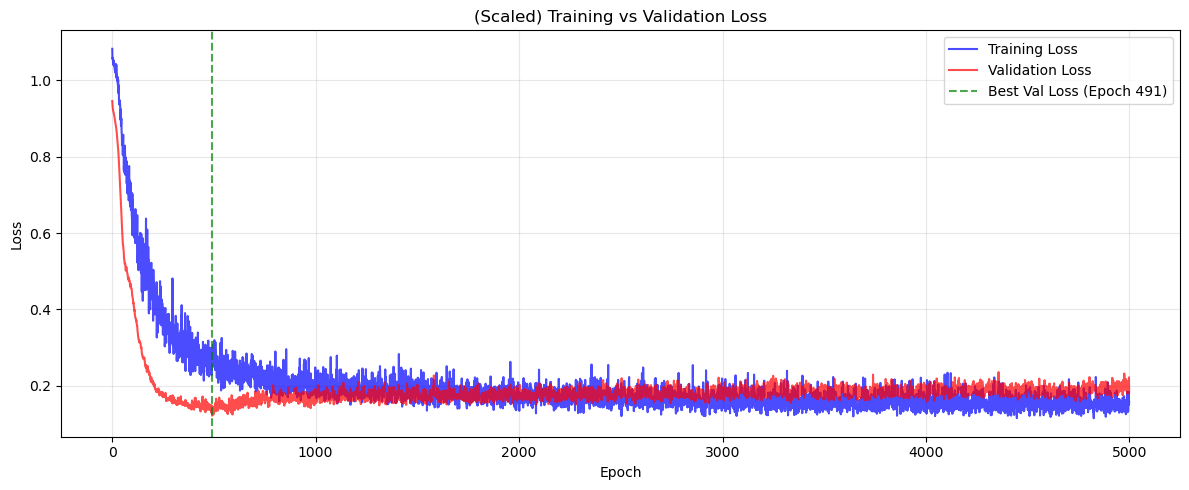

In [ ]:
plt.figure(figsize=(12, 5))

plt.plot(train_losses, label='Training Loss', color='blue', alpha=0.7)
plt.plot(val_losses, label='Validation Loss', color='red', alpha=0.7)
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# Add annotation to highlight overfitting
if len(val_losses) > 50:
    # Find where validation loss starts increasing
    val_losses_array = np.array(val_losses)
    min_val_epoch = np.argmin(val_losses_array)
    plt.axvline(x=min_val_epoch, color='green', linestyle='--', alpha=0.7, label=f'Best Val Loss (Epoch {min_val_epoch})')
    plt.legend()

plt.tight_layout()
plt.show()

In [48]:
model.load_state_dict(best_model_state)             # Recover the best model
model.eval()

with torch.no_grad(): 
    y_test_pred = model(X_test)

test_loss = criterion(y_test_pred, y_test)

print(f'Test loss: {test_loss: .4f}')

Test loss:  0.1825


## 4. Discussion

### 4.1 Scaling
Since the neural networks contains an optimization procedure, it is recommended to scale (`StandardScaler()`) dataset before training.

### 4.2 Purpose of validation set
- Model selection (Hyperparameter tuning): comparing multiple models
- Early stopping in NN: preventing overfitting

### 4.3 Valid Validation Set Design
Is random split **always** the best?

#### Case 1: Time-dependent data
Assume that the future values depends on the past. What would be a better way to split your training data?

#### Case 2: Classification with an imbalanced class distribution
Suppose one class appears much less frequently than the others. What would be a better way to split your training data?

## 5. Exercise
The training set is available on the website. Give it a shot and see if you can beat my model!

The test set will be available at the end of the lab session.

In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
X_train, y_train = pd.read_csv("X_train.csv", header=None), pd.read_csv("y_train.csv", header=None)

### 5.1 Your Model

```python
class Model(nn.Module):
    def __init__(self, ...):
        super().__init__()
        layers = []
        
        ########################
        ### Build your model ###
        ########################

        self.net = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.net(x)
```

### 5.2 Train your model

```python
# Seed
torch.manual_seed(100)

# Instantiation
model = Model(...)

# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = `ChooseYourOptimizer`

# Epoch
epochs = `EPOCHS`  # Reasonable number of epochs

# History
train_losses = []
val_losses = []

# Best model
best_val_loss = float('inf')     # starting with infinity
best_model_state = None          # best model parameters

print("Training started...")
print(f"{'='*50}\n")

for epoch in range(epochs):
    # Training phase
    model.train()                                # Set the model to training mode
    
    pred = model(X_train)                        # (1) Forward
    
    loss = criterion(pred, y_train)              # (2) Loss computation
    
    optimizer.zero_grad()                        # Clear previous grad
    loss.backward()                              # (3) Gradient computation
    
    optimizer.step()                             # (4) Parameter update

    train_losses.append(loss.item())             # Track train loss
    
    # Validation phase
    model.eval()                                 # Set the model to evaluation mode
    with torch.no_grad():                        # Disable gradient tracking
        val_pred = model(X_val)          
        val_loss = criterion(val_pred, y_val)
        val_losses.append(val_loss.item())       # Track validation loss

        # Save best model
        if val_loss.item() < best_val_loss:
            best_val_loss = val_loss.item()
            best_model_state = model.state_dict()   # Save the best model parameters

    # Print progress every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1:3d}, Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")

print(f"\n{'='*50}")
print("Training completed!")
print(f"Best loss: {best_val_loss:.4f}")
```

### 5.3 Loss landscape

```python
plt.figure(figsize=(12, 5))

plt.plot(train_losses, label='Training Loss', color='blue', alpha=0.7)
plt.plot(val_losses, label='Validation Loss', color='red', alpha=0.7)
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# Add annotation to highlight overfitting
if len(val_losses) > 50:
    # Find where validation loss starts increasing
    val_losses_array = np.array(val_losses)
    min_val_epoch = np.argmin(val_losses_array)
    plt.axvline(x=min_val_epoch, color='green', linestyle='--', alpha=0.7, label=f'Best Val Loss (Epoch {min_val_epoch})')
    plt.legend()

plt.tight_layout()
plt.show()
```

### 5.4 Evaluate with test set later.

```python
X_test, y_test = pd.read_csv("X_test.csv", header=None), pd.read_csv("y_test.csv", header=None)

model.load_state_dict(best_model_state)
model.eval()

with torch.no_grad(): 
    y_test_pred = model(X_test)

test_loss = criterion(y_test_pred, y_test)

print(f'Test loss: {test_loss: .4f}')
````